<a href="https://colab.research.google.com/github/IrinaFab/Bank-MK/blob/main/BankMkting_features_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:



# Import libraries
## Basic libs
import pandas as pd
import numpy as np
from operator import itemgetter 
import warnings
from pandas._libs import index
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
# from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
# from sklearn.ensemble import GradientBoostingRegressor   
from sklearn.ensemble import GradientBoostingClassifier  

# Configure libraries
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('seaborn')

In [ ]:
url = 'https://raw.githubusercontent.com/ShawnLiu119/CapstoneProject_BankingMarketing/main/rawdata/bank-additional-full.csv'
data = pd.read_csv(url, sep=';')

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data['education'].value_counts()

data_1 = data.copy()
data_1 = data[data_1['education'] != 'illiterate']

data_1['edu_new'] = data_1['education'].map({'basic.4y': 'pre_high', 
                                         'basic.9y': 'pre_high',
                                         'basic.6y': 'pre_high',
                                         'university.degree' : 'post_high',
                                         'professional.course':'post_high',
                                         'high.school' : 'high',
                                         'unknown' :'unknown' })

In [ ]:
def map_job(row):
    if row['job'] in ['admin.', 'management', 'entrepreneur','self-employed']:
        cat = 'white_collar'
    elif row['job'] in ['housemaid', 'blue-collar', 'technician', 'services']:
        cat = 'blue_collar'
    elif row['job'] in ['student', 'retired', 'unemployed']:
        cat = 'not_working'
    else:
        cat = 'unknown'
    return cat

data_1['job_new'] = data_1.apply(map_job, axis=1)
data_1['job_new'].value_counts(dropna = False)

blue_collar     21017
white_collar    16217
not_working      3606
unknown           330
Name: job_new, dtype: int64

In [ ]:
def map_month(row):
    if row['month'] in ['mar', 'apr', 'may']:
        cat = 'spring'
    elif row['month'] in ['jun', 'jul', 'aug']:
        cat = 'summer'
    elif row['month'] in ['sep', 'oct', 'nov']:
        cat = 'fall'
    else:
        cat = 'winter'
    return cat

data_1['season'] = data_1.apply(map_month, axis=1)
data_1['season'].value_counts(dropna = False)

summer    18660
spring    16942
fall       5386
winter      182
Name: season, dtype: int64

In [ ]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'edu_new', 'job_new',
       'season'],
      dtype='object')

### Data Transformation - V1 (Agreed on Team Discussion)

In [ ]:
#This transformed dataframe is based on group discussion on 7/23
# - keep all numerical features as they are
# - consolidate categorical features (education, job, season) and drop originial ones

df_tran_1 = data_1[['age', 'marital', 'default', 'housing', 'loan',
       'contact', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'edu_new', 'job_new', 'season']]

In [ ]:
df_tran_1 = df_tran_1.drop(['duration'], axis=1)
df_tran_1.columns

Index(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'edu_new', 'job_new', 'season'],
      dtype='object')

In [ ]:
df_tran_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1
pdays,999,999,999,999,999
previous,0,0,0,0,0


In [ ]:
df_tran_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41170 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41170 non-null  int64  
 1   marital         41170 non-null  object 
 2   default         41170 non-null  object 
 3   housing         41170 non-null  object 
 4   loan            41170 non-null  object 
 5   contact         41170 non-null  object 
 6   day_of_week     41170 non-null  object 
 7   campaign        41170 non-null  int64  
 8   pdays           41170 non-null  int64  
 9   previous        41170 non-null  int64  
 10  poutcome        41170 non-null  object 
 11  emp.var.rate    41170 non-null  float64
 12  cons.price.idx  41170 non-null  float64
 13  cons.conf.idx   41170 non-null  float64
 14  euribor3m       41170 non-null  float64
 15  nr.employed     41170 non-null  float64
 16  y               41170 non-null  object 
 17  edu_new         41170 non-null 

In [ ]:
df_tran_1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41170.0,40.020355,10.419647,17.000,32.000,38.000,47.000,98.000
campaign,41170.0,2.567719,2.770421,1.000,1.000,2.000,3.000,56.000
pdays,41170.0,962.483605,186.890849,0.000,999.000,999.000,999.000,999.000
previous,41170.0,0.172990,0.494964,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41170.0,0.081980,1.570904,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41170.0,93.575777,0.578798,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41170.0,-40.502842,4.627973,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41170.0,3.621337,1.734444,0.634,1.344,4.857,4.961,5.045
nr.employed,41170.0,5167.033838,72.255836,4963.600,5099.100,5191.000,5228.100,5228.100


In [ ]:
TARGET = 'y'

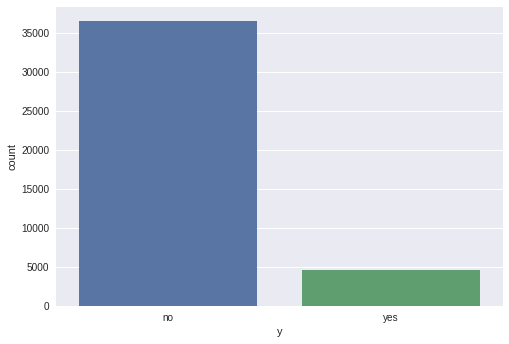

In [ ]:
sns.countplot(x=TARGET,data=df_tran_1)

In [ ]:
df_tran_1['y'].value_counts()

no     36534
yes     4636
Name: y, dtype: int64

In [ ]:
df_tran_1['y'].value_counts(normalize='True')

no     0.887394
yes    0.112606
Name: y, dtype: float64

In [ ]:
d1=df_tran_1.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
df_tran_1=d1

In [ ]:
df_tran_1['y'].value_counts()

yes    37088
no     36534
Name: y, dtype: int64

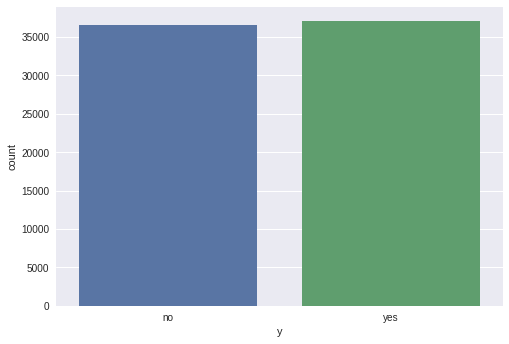

In [ ]:
sns.countplot(x=TARGET,data=df_tran_1)

In [ ]:
df_tran_1['y'].value_counts(normalize='True')

yes    0.503762
no     0.496238
Name: y, dtype: float64

In [ ]:
# displaying the data types and store into a variable
dt = df_tran_1.dtypes
dt

age                 int64
marital            object
default            object
housing            object
loan               object
contact            object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
edu_new            object
job_new            object
season             object
dtype: object

In [ ]:
objList = []
intList = []
floatList = []

for i in dt.index:
    if i in ([TARGET]) : continue
    if dt[i] in (['object']) : objList.append(i)
    if dt[i] in (['int64']) : intList.append(i)
    if dt[i] in (['float64']) : floatList.append(i)
        
print('OBJECTS')
print('-------')
for i in objList:
    print(i)
print('\n')

print('INTEGERS')
print('--------')
for i in intList:
    print(i)
print('\n')

print('FLOATS')
print('------')
for i in floatList:
  print(i)

OBJECTS
-------
marital
default
housing
loan
contact
day_of_week
poutcome
edu_new
job_new
season


INTEGERS
--------
age
campaign
pdays
previous


FLOATS
------
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed


In [ ]:
#replacing no and yes by 0 and 1 respectively as our target values!
df_tran_1[TARGET] = df_tran_1[TARGET].replace(['no','yes'],[0,1])
df_tran_1[TARGET].unique()

array([0, 1])

In [ ]:
df_tran_1.shape

(73622, 20)

In [ ]:
df_tran_1.head().T

,0,1,2,3,4
age,56,57,37,40,56
marital,married,married,married,married,married
default,no,unknown,no,no,no
housing,no,no,yes,no,no
loan,no,no,no,no,yes
contact,telephone,telephone,telephone,telephone,telephone
day_of_week,mon,mon,mon,mon,mon
campaign,1,1,1,1,1
pdays,999,999,999,999,999
previous,0,0,0,0,0


In [ ]:
# using one hot encoding to transform the categorical variables into numeric variables
for i in objList :
    print('Class = ', i )
    thePrefix = 'z_' + i
    print( thePrefix )
    y = pd.get_dummies(df_tran_1[i], prefix = thePrefix, dummy_na = False) 
    print(type(y)) 
    print(y.head().T )
    df_tran_1 = pd.concat([df_tran_1, y], axis = 1 )
    df_tran_1 = df_tran_1.drop(i, axis = 1 )

Class =  marital
z_marital
<class 'pandas.core.frame.DataFrame'>
                    0  1  2  3  4
z_marital_divorced  0  0  0  0  0
z_marital_married   1  1  1  1  1
z_marital_single    0  0  0  0  0
z_marital_unknown   0  0  0  0  0
Class =  default
z_default
<class 'pandas.core.frame.DataFrame'>
                   0  1  2  3  4
z_default_no       1  0  1  1  1
z_default_unknown  0  1  0  0  0
z_default_yes      0  0  0  0  0
Class =  housing
z_housing
<class 'pandas.core.frame.DataFrame'>
                   0  1  2  3  4
z_housing_no       1  1  0  1  1
z_housing_unknown  0  0  0  0  0
z_housing_yes      0  0  1  0  0
Class =  loan
z_loan
<class 'pandas.core.frame.DataFrame'>
                0  1  2  3  4
z_loan_no       1  1  1  1  0
z_loan_unknown  0  0  0  0  0
z_loan_yes      0  0  0  0  1
Class =  contact
z_contact
<class 'pandas.core.frame.DataFrame'>
                     0  1  2  3  4
z_contact_cellular   0  0  0  0  0
z_contact_telephone  1  1  1  1  1
Class =  day_of_week
z

In [ ]:
df_tran_1.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
age,56.000,57.000,37.000,40.000,56.000,45.000,59.000,41.000,24.000,25.000,41.000,25.000,29.000,57.000,35.000
campaign,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
# creating a copy of the data set
x = df_tran_1.copy()
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
y,0.000,0.000,0.000,0.000,0.000


In [ ]:
#Preparing the data to be used to build the decision tree, drop TARGET 
x = x.drop( TARGET, axis = 1 )
x.head().T

,0,1,2,3,4
age,56.000,57.000,37.000,40.000,56.000
campaign,1.000,1.000,1.000,1.000,1.000
pdays,999.000,999.000,999.000,999.000,999.000
previous,0.000,0.000,0.000,0.000,0.000
emp.var.rate,1.100,1.100,1.100,1.100,1.100
cons.price.idx,93.994,93.994,93.994,93.994,93.994
cons.conf.idx,-36.400,-36.400,-36.400,-36.400,-36.400
euribor3m,4.857,4.857,4.857,4.857,4.857
nr.employed,5191.000,5191.000,5191.000,5191.000,5191.000
z_marital_divorced,0.000,0.000,0.000,0.000,0.000


In [ ]:
# storing the target into a dataframe
y = df_tran_1[[TARGET]] 
y.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
y,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Splitting dataset 

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [ ]:
print('FLAG DATA:', '\n')
print('Shape of original INPUT data set:', x.shape)
print('Shape of original OUTPUT data set:', y.shape, '\n')
print('Shape of input TRAINING data set = ', x_train.shape)
print('Shape of output TRAINING data set = ', y_train.shape, '\n')
print('Shape of input TEST data set = ', x_test.shape)
print('Shape of output TEST data set = ', y_test.shape)

FLAG DATA: 

Shape of original INPUT data set: (73622, 44)
Shape of original OUTPUT data set: (73622, 1) 

Shape of input TRAINING data set =  (58897, 44)
Shape of output TRAINING data set =  (58897, 1) 

Shape of input TEST data set =  (14725, 44)
Shape of output TEST data set =  (14725, 1)


In [ ]:
# displaying the first five records in the train var. data set
x_train.head().T

,2011,34459,38431,9585,31163
age,37.000,42.000,56.000,24.000,28.000
campaign,4.000,1.000,1.000,1.000,2.000
pdays,999.000,999.000,6.000,999.000,999.000
previous,0.000,0.000,1.000,0.000,0.000
emp.var.rate,1.100,-1.800,-3.400,1.400,-1.800
cons.price.idx,93.994,92.893,92.431,94.465,92.893
cons.conf.idx,-36.400,-46.200,-26.900,-41.800,-46.200
euribor3m,4.857,1.266,0.733,4.961,1.334
nr.employed,5191.000,5099.100,5017.500,5228.100,5099.100
z_marital_divorced,0.000,1.000,0.000,0.000,0.000


In [ ]:
# displaying the first five records in the train predictions data set

y_train.head().T

,2011,34459,38431,9585,31163
y,0,0,1,1,1


In [ ]:
# creating decision tree classifier my_tree setting 4-level deep with respect of TARGET
# fitting the decision tree 

my_tree = tree.DecisionTreeClassifier (max_depth = 4) 
my_tree = my_tree.fit (x_train, y_train [ TARGET]) 

In [ ]:
# predicting subscription chances for the training and test data
y_Pred_train = my_tree.predict(x_train)
y_Pred_test = my_tree.predict(x_test)

In [ ]:
# calculating the accuracy based on the metrics between the real scores and the predicted ones for both taining and test data sets
print('The accuracy of the model based on the training data set is ', metrics.accuracy_score(y_train [TARGET], y_Pred_train))
print('The accuracy of the model based on the test data set is ', metrics.accuracy_score(y_test [TARGET], y_Pred_test))

The accuracy of the model based on the training data set is  0.7369645313004058
The accuracy of the model based on the test data set is  0.7404414261460102


Decision tree is 73.69% accurate, meaning that 73.69% of the time my predictions were correct for the training data set. Decision tree is 74.10% accurate, meaning that 74.10% of the time my predictions were correct for the test data set. The two values testing the accuracy on training and test data are very close meaning that the model is a good model.

RECEIVER OPERATING CHARACTERISTICS (ROC) CURVE


*   An ROC curve plots TPR vs. FPR at different classification thresholds.
*   Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

In [ ]:
# predicting probability for training data set
probs = my_tree.predict_proba(x_train)

In [ ]:
# displaying the first ten probabilities for training data set
probs[0:10]

array([[0.82361863, 0.17638137],
       [0.64247192, 0.35752808],
       [0.04082864, 0.95917136],
       [0.73924731, 0.26075269],
       [0.64247192, 0.35752808],
       [0.64247192, 0.35752808],
       [0.64247192, 0.35752808],
       [0.73924731, 0.26075269],
       [0.73924731, 0.26075269],
       [0.64247192, 0.35752808]])

In [ ]:
# prediction for the first 10 people; .....out of the first ten recods, none is predicted to subscribe
y_Pred_train [0:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# probability subscription for test data set
p1 = probs[:,1]

# displaying the subsc probability for the first 10 records for test data set
p1[0:10]

array([0.17638137, 0.35752808, 0.95917136, 0.26075269, 0.35752808,
       0.35752808, 0.35752808, 0.26075269, 0.26075269, 0.35752808])

In [ ]:
# predicting probability for test data set

probs = my_tree.predict_proba(x_test)
probs[0:10]

array([[0.04082864, 0.95917136],
       [0.64247192, 0.35752808],
       [0.24008351, 0.75991649],
       [0.73924731, 0.26075269],
       [0.19099966, 0.80900034],
       [0.64247192, 0.35752808],
       [0.1304475 , 0.8695525 ],
       [0.19099966, 0.80900034],
       [0.64247192, 0.35752808],
       [0.04082864, 0.95917136]])

In [ ]:
'''
TRAINING DATA
False positive rate (1 - SPECIFICITY) shows the proportion of subsc incorrectly classified as non-subscribers
True positive rate (SENSITIVITY) shows the proportion of subsc correctly classified
'''
fpr_train, tpr_train, treshhold = metrics.roc_curve (y_train [TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

In [ ]:
# probability subscribers for test data set
p1 = probs[:,1]

# displaying the deposit subscribers probability for the first 10 records for test data set
p1[0:10]

array([0.95917136, 0.35752808, 0.75991649, 0.26075269, 0.80900034,
       0.35752808, 0.8695525 , 0.80900034, 0.35752808, 0.95917136])

In [ ]:
## TEST DATA
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
# False Positive Rate for first 10 records for training data set 
fpr_train[0:10] 

array([0.        , 0.00694682, 0.00985559, 0.01396208, 0.02922456,
       0.02939566, 0.06744918, 0.07453289, 0.07846828, 0.12494011])

In [ ]:
# True Positive Rate for first 10 records for training data set 
tpr_train[0:10]

array([0.        , 0.16070767, 0.1894861 , 0.2167481 , 0.31693345,
       0.3178433 , 0.47656276, 0.49870261, 0.51096883, 0.60080876])

In [ ]:
# False Positive Rate for first 10 records for test data set 
fpr_test[0:10]

array([0.        , 0.00793217, 0.01094092, 0.014907  , 0.02899344,
       0.02926696, 0.06400438, 0.07125274, 0.07508206, 0.12035011])

In [ ]:
# Test Positive Rate for first 10 records for test data set 
tpr_test[0:10]

array([0.        , 0.15095103, 0.1825172 , 0.20720356, 0.31228922,
       0.31296371, 0.46971536, 0.49332254, 0.50465399, 0.60151086])

In [ ]:
fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

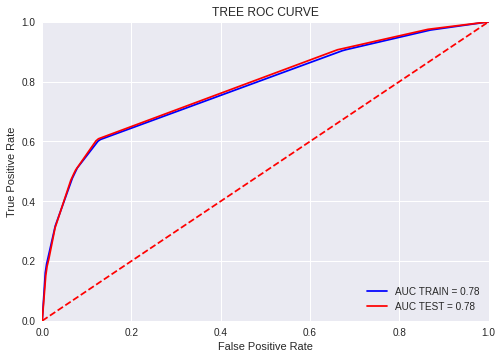

In [ ]:
# printing ROC curve using matplotlib for training and test data 

plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The larger the area under the curve (or the higher the ROC curve), the better is the performance. 
The ROC in the figure has a high AUC (area under the curve).  
There is a point on the graph where TPR(sensitivity) is quite high and FPR(1-specificity) is dramatically low. If we go back and look at our business needs, we need a high TPR and low FPR that is exactly what we are getting from that point on this ROC. 
The threshold corresponding to that point can be said to be the best threshold value. 
The diagonal line represents the values where the true positive rate is equal to the false positive rate. 
The blue line represents the ROC curve for the training data set and its AUC is 78%. The red line represents the ROC curve for the test training set and its AUC is 78%.
The values of test data and the training are similar.


In [ ]:
feature_cols = list(x.columns.values) 
tree.export_graphviz(my_tree, out_file = 'BANK1.txt',filled = True, rounded = True, feature_names = feature_cols, impurity = False, class_names=['YES', 'NO'])

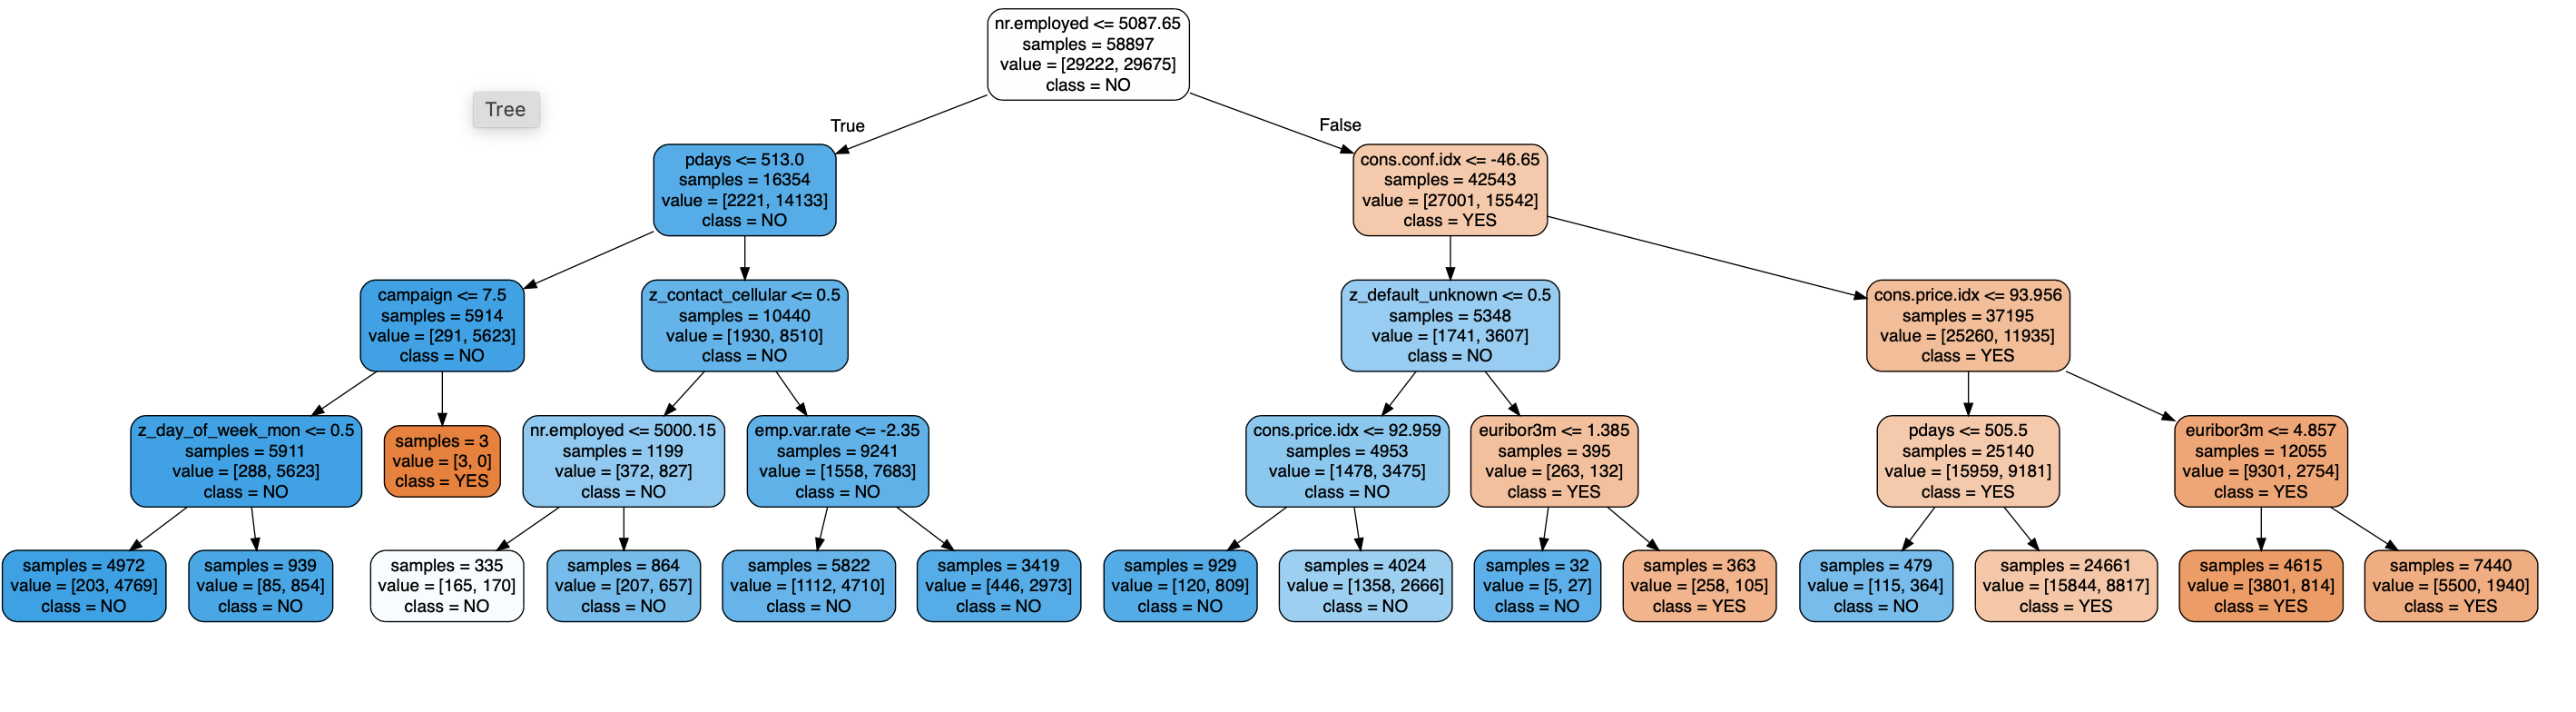

In [ ]:
def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined!' for i in tree_.feature ]
    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

In [ ]:
vars_tree_flag = getTreeVars( my_tree, feature_cols )

In [ ]:
for i in vars_tree_flag:
    print(i)

campaign
pdays
emp.var.rate
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
z_default_unknown
z_contact_cellular
z_day_of_week_mon


These are the only variables that will be used and are predictive of 
deposit subscription.

Random Forest

In [ ]:
# creating tree search function for Random Forest

def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key = itemgetter(1),reverse = True)
    return theList

In [ ]:
# random forest classifier with respect to TARGET; 100 decision trees; random starting state to get the same results

fm01_RF = RandomForestClassifier( n_estimators = 100, random_state = 1 )
fm01_RF = fm01_RF.fit(x_train, y_train[ TARGET] )

In [ ]:
# calculate the accuracy
print('RANDOM FOREST:')
print('Probability of deposit subscription', '\n')
print('The accuracy of the model based on the training data set is ',metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('The accuracy of the model based on the test data set is',metrics.accuracy_score(y_test[TARGET], y_Pred_test))

RANDOM FOREST:
Probability of deposit subscription 

The accuracy of the model based on the training data set is  0.7369645313004058
The accuracy of the model based on the test data set is 0.7404414261460102


In [ ]:
# scoring the predictions (client subscribes or not)
y_Pred_train = fm01_RF.predict(x_train)
y_Pred_test = fm01_RF.predict(x_test)

In [ ]:
# create a ROC curve
probs = fm01_RF.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

In [ ]:
# saving them for final comparison 
fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

In [ ]:
feature_cols = list( x.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

In [ ]:
# printing the variables that are the most important
for i in vars_RF_flag :
   print( i )

('age', 100)
('euribor3m', 70)
('campaign', 50)
('nr.employed', 36)
('emp.var.rate', 25)
('cons.conf.idx', 17)
('cons.price.idx', 14)
('pdays', 12)


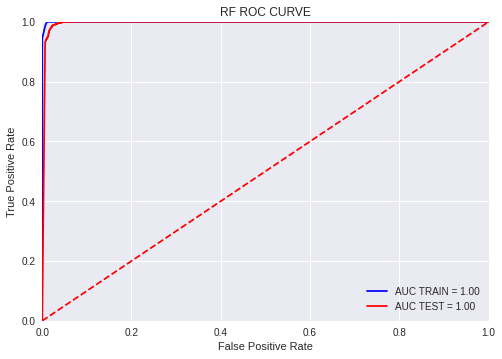

In [ ]:
# creating ROC curve
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Gradient Boosting

In [ ]:
# creating gradient boosting classifier with respect to TARGET
fm01_GB = GradientBoostingClassifier( random_state = 1 )
fm01_GB = fm01_GB.fit( x_train, y_train[ TARGET ] )

In [ ]:
# predicting the training and test data sets
y_Pred_train = fm01_GB.predict(x_train)
y_Pred_test = fm01_GB.predict(x_test)

In [ ]:
# testing the accuracy
print('GRADIENT BOOSTING:')
print('Probability of deposit subscription:', '\n')
print('Accuracy Train:', metrics.accuracy_score(y_train[TARGET], y_Pred_train))
print('Accuracy Test:', metrics.accuracy_score(y_test[TARGET], y_Pred_test))

GRADIENT BOOSTING:
Probability of deposit subscription: 

Accuracy Train: 0.7529245971781245
Accuracy Test: 0.7546349745331069


In [ ]:
# creating the ROC curve
probs = fm01_GB.predict_proba(x_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( y_train[TARGET], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(x_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( y_test[TARGET], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

In [ ]:
# printing variables that are predictive of deposit subscription
feature_cols = list( x.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

for i in vars_GB_flag:
    print(i)

('nr.employed', 100)
('euribor3m', 39)
('cons.conf.idx', 19)
('pdays', 5)


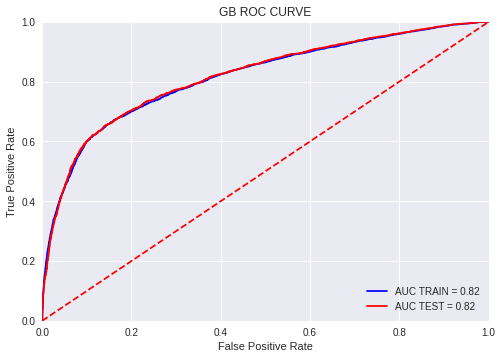

In [ ]:
# creating ROC curve 
plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color = 'red')
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()